# BoomBikes Case Study

Problem Statement:

Consider a US bike-sharing provider BoomBikes has gathered a large dataset on daily bike demands across the American market based on some factors. This data used by the management to understand how exactly the demands vary with different features. It will help them to come up with a mindful business plan to be able to accelerate its revenue.

Essentially, the company wants —

 - Which variables are significant in predicting the demand for shared bikes.

 - How well those variables describe the bike demands

 - To know the accuracy of the model, i.e. how well these variables can predict demand of shared biker.

 - So interpretation is important!


Steps/Approach for this case study: 

1. Reding, understanding and visualising data
2. Preparing the data for modeling (train-test split, rescaling)
3. Training the data
4. Residual Analysis
5. Prediction and Evaluation of data


## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [1079]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#import libraries/packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries

import sklearn
from sklearn.model_selection import train_test_split   # Split data set into test and train
from sklearn.preprocessing import MinMaxScaler         # Scale dataset on minMax scaler
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score

# import statsmodel

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1080]:
# Load dataset

bikes = pd.read_csv('day.csv')
bikes.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe


In [1081]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1082]:
print(bikes.shape)

bikes.describe()


(730, 16)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From the Data dictionary we can understand few numercal columns are actually categorical.
- So it will be good to convert them back to categorical
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- weathersit: i)Clear, ii) Mist, iii)Light Snow, iv) Heavy Rain

In [1083]:
# visualise the value distribution of weathersit
bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

**Clearly we can see that weathersit has only 3 levels in the dataset, however in the dicstionary it was spread across
4-levels

In [1084]:
# visualise the value distribution of season
bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1085]:
# Converting below categorical variables as per Data dict with Find and replace method

categ_nums = {"season": {1:'spring',2:'summer',3:'fall',4:'winter'},
              "weathersit":{1:'Clear',2:'Mist+Cloudy',3:'Light Snow',4:'Heavy Rain'},
              "mnth": {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'Apr',
                       5: 'May', 6: 'June', 7: 'Jul',8: 'Aug',9: 'Sept', 10:'Oct', 11:'Nov', 12:'Dec' },
              "weekday": {6:'Mon',0:'Tue',1:'Wed',2:'Thu',3:'Fri',4: 'Sat',5: 'Sun'}
                }

bikes.replace(categ_nums, inplace=True)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1086]:
bikes.weathersit.value_counts()

Clear          463
Mist+Cloudy    246
Light Snow      21
Name: weathersit, dtype: int64

In [1087]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [1088]:
# Lets Drop few columns as they are irrelevent or redundant for case study

# Drop 'instant', 'casual' and 'registered' as we we understood from data set that these columns are of less use

bikes.drop(['instant','casual','registered'], axis = 1, inplace = True)

In [1089]:
# dteday has already been derived to yr,mnth and weekday so we can easily drop this column

bikes.drop(['dteday'], axis = 1, inplace = True)

## Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

Visualising Numeric Variables
- Let's make a pairplot of all the numeric variables



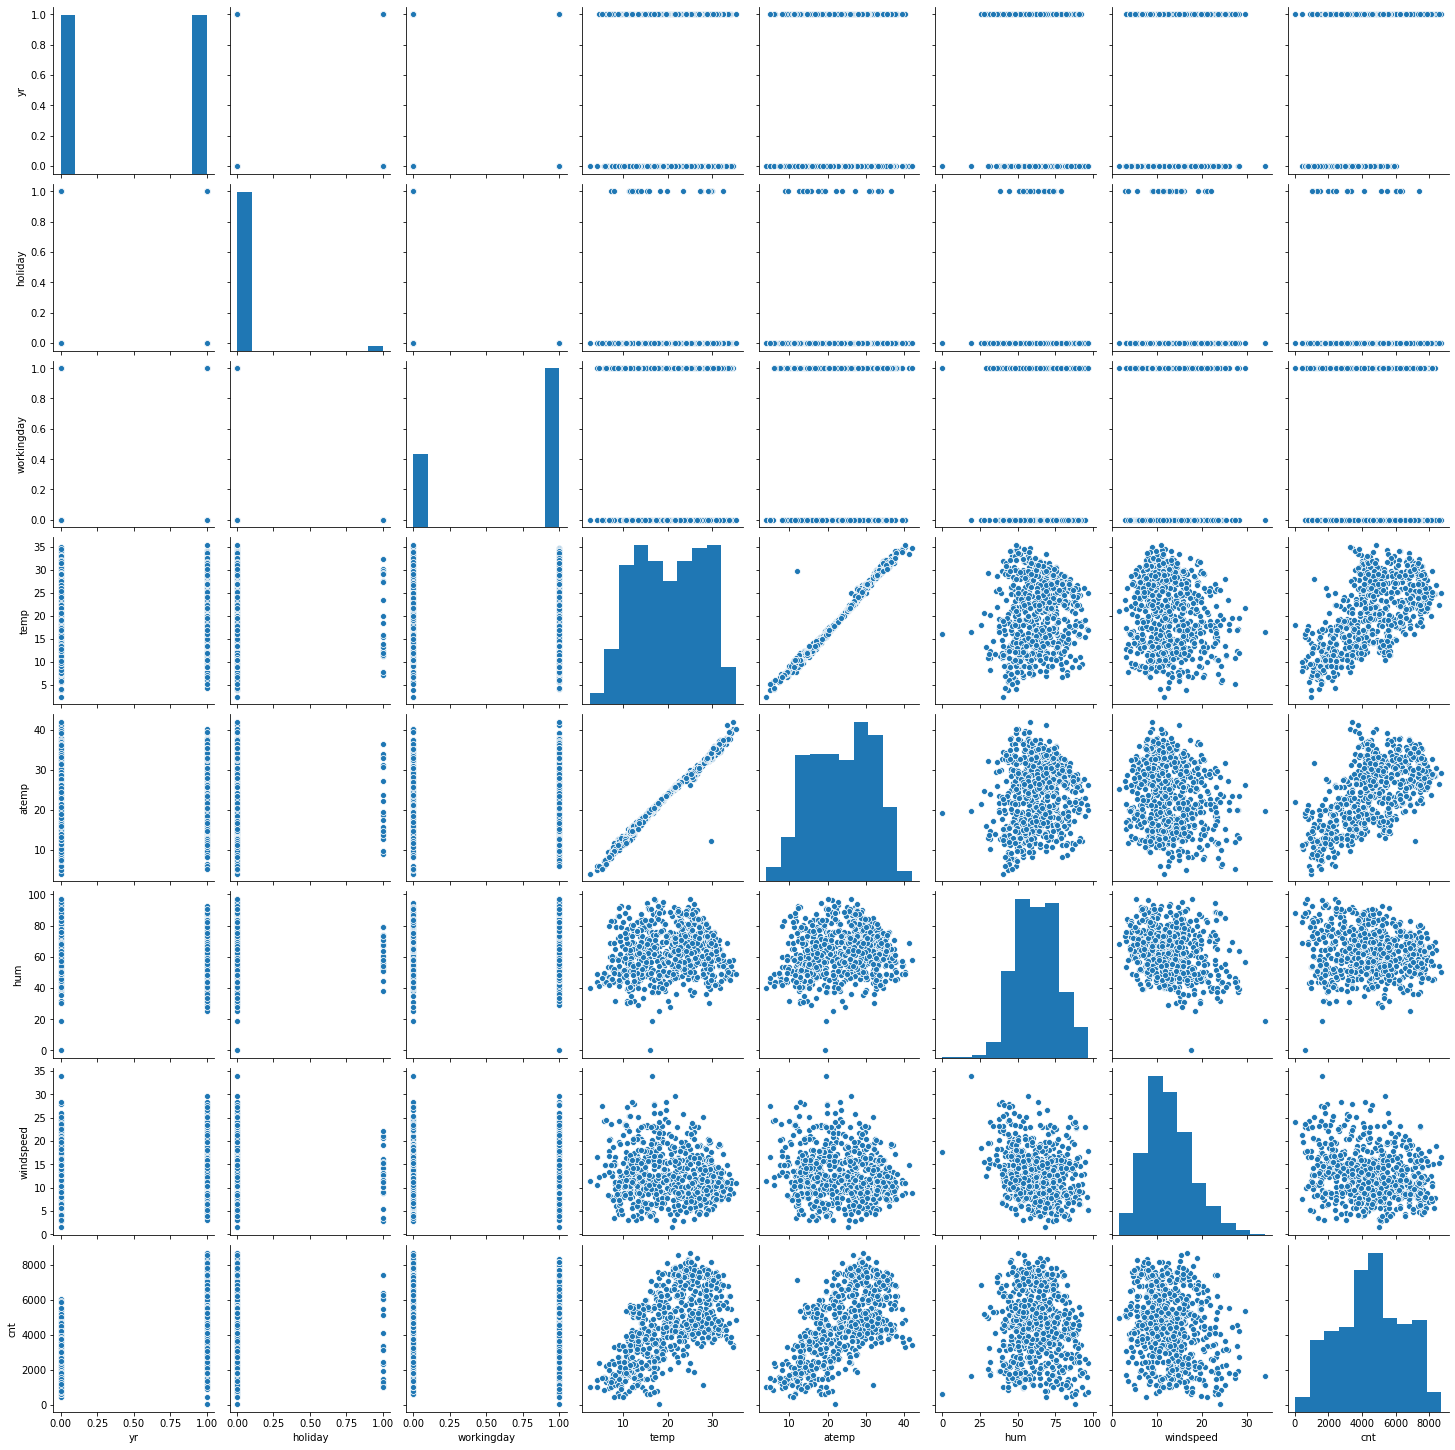

In [1090]:
sns.pairplot(bikes)
plt.show()

We can observe from the above pairplot that atemp with temp has identical collinerity with each other

In [1091]:
# Drop 'atemp' as we have Observed it is a redundant column as temp

bikes.drop(['atemp'], axis = 1, inplace = True)

Visualising Categorical Variables
- As we can notice, there are a few categorical variables as well. 
- Let's make a boxplot for some of these variables.

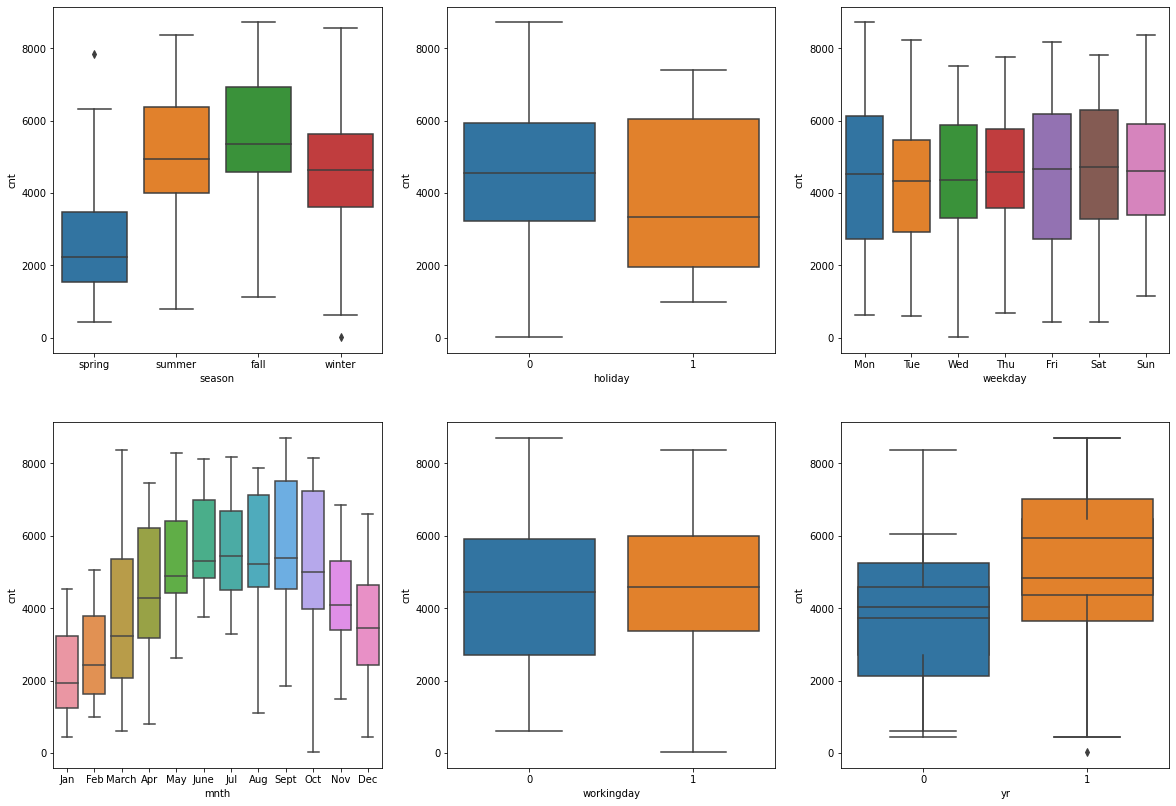

In [1092]:
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.show()

We can also visualise some of these categorical features parallely by using the hue argument. 
 - Below is the plot for weathersit with cnt as the hue.

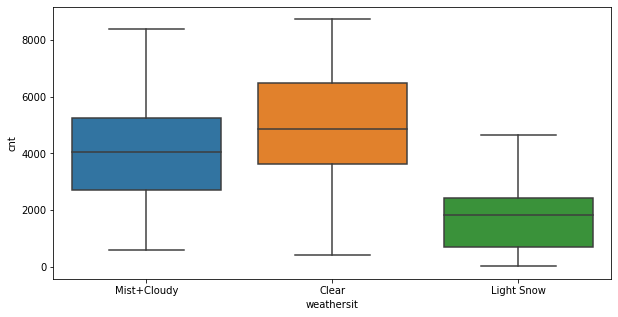

In [1093]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

## Step 3: Data Preparation¶
We can see that the dataset has many categorical columns with values as String.

But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them dummy values and drop the categorical one.

Substeps to be performed in data prepration section
- Encoding:
  - Convert the binary data to 1/0
  - Convert categorical variables to dummy variables furnishingstatus
  - Spliting data into test-train
  - Rescaling of variables

In [1094]:
# Check the bikes dataframe now

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Dummy Variables

- We observed few categorical variables with multi levels that need to be converted into integer..
   - 'season' has four levels. 
   - 'weathersit' has three
   - 'weekday' has seven levels
   - 'mnth' has 12 levels
   
For this, we will use something called dummy variables.

In [1095]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
season = pd.get_dummies(bikes['season'])

In [1096]:
# Check what the dataset 'status' looks like
season.value_counts()

fall  spring  summer  winter
1     0       0       0         188
0     0       1       0         184
      1       0       0         180
      0       0       1         178
dtype: int64

Now, we don't need four columns. We can drop the fall column, as the type of fall can be identified with just the last three columns where —

- 000 will correspond to fall
- 100 will correspond to spring
- 010 will correspond to summer
- 001 will correspond to winter

In [1097]:
# Let's drop the first column from season df using 'drop_first = True'

season = pd.get_dummies(bikes['season'],drop_first = True)

In [1098]:
# Add the results to the original bikes dataframe

bikes = pd.concat([bikes, season], axis = 1)

In [1099]:
# Now let's see the head of our dataframe.

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [1100]:
# Drop 'season' as we have created the dummies for it

bikes.drop(['season'], axis = 1, inplace = True)

In [1101]:
print(bikes.shape)
bikes.head()

(730, 13)


,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


- Create dummy variables for all other categorical variables similar to previous approach for season
- create dummy variables using 'drop_first = True'

In [1102]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit'
# Let's drop the first column from season df using 'drop_first = True'

weathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)


In [1103]:
weathersit.value_counts()

Light Snow  Mist+Cloudy
0           0              463
            1              246
1           0               21
dtype: int64

### Now, we don't need three columns. We can drop the Clear column, as the type of Clear can be identified with just the last two columns where —

00 will correspond to Clear

In [1104]:
# Add the results to the original bikes dataframe

bikes = pd.concat([bikes, weathersit], axis = 1)

In [1105]:
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist+Cloudy
0,0,Jan,0,Mon,0,Mist+Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Tue,0,Mist+Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [1106]:
# Drop 'weathersit' as we have created the dummies for it

bikes.drop(['weathersit'], axis = 1, inplace = True)

In [1107]:
print(bikes.shape)
bikes.head()

(730, 14)


,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist+Cloudy
0,0,Jan,0,Mon,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Tue,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Wed,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Thu,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Fri,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [1108]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit'
# Let's drop the first column from season df using 'drop_first = True'

weekday = pd.get_dummies(bikes['weekday'],drop_first = True)

In [1109]:
# Add the results to the original bikes dataframe

bikes = pd.concat([bikes, weekday], axis = 1)

In [1110]:
print(bikes.shape)
bikes.head()

(730, 20)


,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist+Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,Jan,0,Mon,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0
1,0,Jan,0,Tue,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0
2,0,Jan,0,Wed,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1
3,0,Jan,0,Thu,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,Jan,0,Fri,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0


### Now, we don't need 7 columns. We can drop the Fri column, as the type of Fri can be identified with just the last 6 columns where —

000000 will correspond to Fri

In [1111]:
# Drop 'weekday' as we have created the dummies for it

bikes.drop(['weekday'], axis = 1, inplace = True)

In [1112]:
print(bikes.shape)
bikes.head()

(730, 19)


,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist+Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,Jan,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0
1,0,Jan,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0
2,0,Jan,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1
3,0,Jan,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,Jan,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0


In [1113]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth'
# Let's drop the first column from mnth df using 'drop_first = True'

mnth = pd.get_dummies(bikes['mnth'],drop_first = True)

In [1114]:
# Add the results to the original bikes dataframe

bikes = pd.concat([bikes, mnth], axis = 1)

In [1115]:
print(bikes.shape)
bikes.head()

(730, 30)


,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,June,March,May,Nov,Oct,Sept
0,0,Jan,0,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


### Now, we don't need 12 columns. We can drop the Apr column, as the type of Apr can be identified with just the last 11 columns where —

00000000000 will correspond to Apr

In [1116]:
# Drop 'weekday' as we have created the dummies for it

bikes.drop(['mnth'], axis = 1, inplace = True)

In [1117]:
print(bikes.shape)
bikes.head()

(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,June,March,May,Nov,Oct,Sept
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1118]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   spring       730 non-null    uint8  
 8   summer       730 non-null    uint8  
 9   winter       730 non-null    uint8  
 10  Light Snow   730 non-null    uint8  
 11  Mist+Cloudy  730 non-null    uint8  
 12  Mon          730 non-null    uint8  
 13  Sat          730 non-null    uint8  
 14  Sun          730 non-null    uint8  
 15  Thu          730 non-null    uint8  
 16  Tue          730 non-null    uint8  
 17  Wed          730 non-null    uint8  
 18  Aug          730 non-null    uint8  
 19  Dec     

### Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [1119]:
# Step 4a: Splitting data into test/train

# there are two way of splitting dataset
# 1 - train_test_split(x,y): it will return X_test,X_train,y_test,t_train
# 2 - pass the dataframe : train_test_split(housing): it will return df_train, df_test

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

In [1120]:
# Lets see the data set size for train and test

print(df_train.shape)
print(df_test.shape)
bikes.head()

(510, 29)
(219, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,June,March,May,Nov,Oct,Sept
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Step 4b: Rescaling the Features

As we understood, scaling doesn't impact your model. Here we can see that all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. 

So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 

- we have two common ways of rescaling:
  - Min-Max scaling
  - Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [1121]:
# 1. Create/Instantite the Scaler object

scaler = MinMaxScaler()

# 2. Create list of numeric variables that need to be scaled except binary and dummy variables

scale_list = ['temp', 'hum', 'windspeed', 'cnt']

# 3. Fit on data
# fit_transform() : it will do the fit() and transform() both on the dataset

df_train[scale_list] = scaler.fit_transform(df_train[scale_list])

In [1122]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,June,March,May,Nov,Oct,Sept
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1123]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,June,March,May,Nov,Oct,Sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 5 : Training the Model
 - We will 1st use the RFE model since dataset has the large numbers of feature(30) 
 - Again we will do the Stepwise approach on the top variables: 

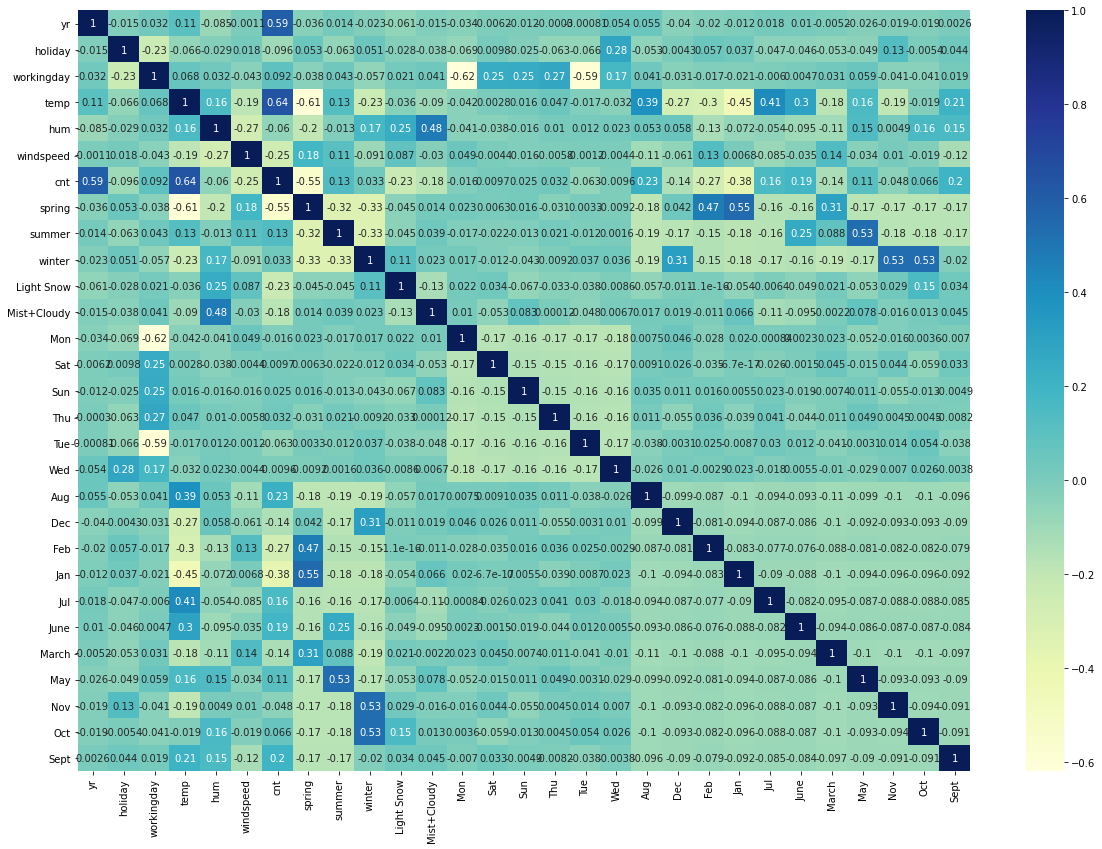

In [1124]:
# Lets see the collinearity between all independent features 

plt.figure(figsize=(20,14))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [1125]:
# From the HeatMap correlation between hum and Mist+Cloudy

### Dividing into X and Y sets for the model building
- pop out the categorical variable cnt

In [1126]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

- Step 5a: RFE (Recursive feature elimination)

In [1127]:
# Importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1128]:
# Running RFE with the output number of the variable equal to 15
# Selecting top 15 variables with RFE 

# Instantiate objectfor linearmodel

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15) # running RFE
rfe = rfe.fit(X_train,y_train)


In [1129]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist+Cloudy', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 8),
 ('Thu', False, 14),
 ('Tue', True, 1),
 ('Wed', False, 9),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('June', False, 11),
 ('March', False, 13),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sept', True, 1)]

In [1130]:
# Lets see the features selected by RFE by using support_

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light Snow', 'Mist+Cloudy', 'Mon', 'Tue', 'Jul',
       'Sept'],
      dtype='object')

In [1131]:
# Also list out features not selected by RFE by using ~support_

X_train.columns[~rfe.support_]


Index(['Sat', 'Sun', 'Thu', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'March',
       'May', 'Nov', 'Oct'],
      dtype='object')

### Now to analyse the obtained statistics lets use statsmodel for summary

Building model using statsmodel, for the detailed statistics

In [1132]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]


In [1133]:
# Adding constant vaiable

X_train_sm_rfe = sm.add_constant(X_train_rfe)

In [1134]:
# Running the linear model

lm = sm.OLS(y_train,X_train_sm_rfe).fit()

In [1135]:
# Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.13e-191
Time:                        19:34:27   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1989      0.028      7.181      

#### `holiday` is insignificant in presence of other variables with high p-value; can be dropped

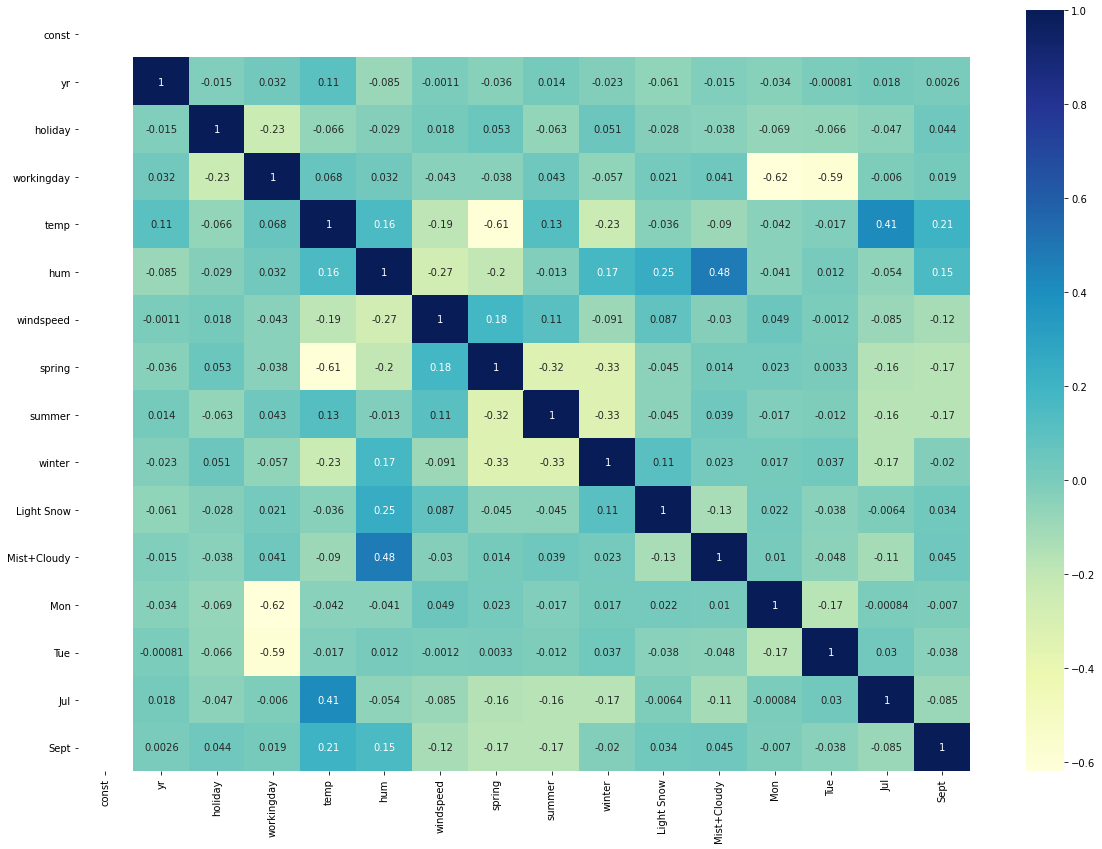

In [1136]:
# Lets see the collinearity between all independent features 

plt.figure(figsize=(20,14))
sns.heatmap(X_train_sm_rfe.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [1137]:

# From the HeatMap we can see the 'hum' and 'Mist+cloudy' are highly correlated
# Lets drop the following features from the dataset ['hum','holiday']

X_train_new = X_train_sm_rfe.drop(['holiday'], axis = 1)

Rebuilding the model without 'hum' and 'holiday'

In [1138]:
# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)


In [1139]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [1140]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.13e-191
Time:                        19:34:28   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1799      0.042      4.276      

With the statmodels statistics all the features looks significant with low p-value
- Let's analyse the VIF for other features

In [1141]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light Snow', 'Mist+Cloudy', 'Mon', 'Tue', 'Jul',
       'Sept'],
      dtype='object')

In [1142]:
X_train_new_vif = X_train_new.drop(['const'], axis=1)

In [1143]:
# Calculate the VIF for the new model
# import VIF package

vif = pd.DataFrame()
X = X_train_new_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,Mon,4.91
4,windspeed,4.90
5,spring,4.80
11,Tue,4.76
7,winter,3.71
6,summer,3.03
9,Mist+Cloudy,2.31


### For our model analysis we'll keep feature with VIF<5

- With the VIF values of each feature obtained above, we can clearly observe 
- workingday and temp has very high VIF value than 5.

Let's drop those columns

In [1144]:
X_train_new = X_train_new.drop(['hum'], axis = 1)


Rebuilding the model without 'hum'


In [1145]:
# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

In [1146]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [1147]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          5.73e-189
Time:                        19:34:28   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1005      0.038      2.618      

In [1148]:
X_train_new_vif = X_train_new.drop(['const'], axis=1)

In [1149]:
# Calculate the VIF for the new model
# import VIF package

vif = pd.DataFrame()
X = X_train_new_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,Mon,4.45
10,Tue,4.21
4,spring,3.82
6,winter,2.80
5,summer,2.75
0,yr,2.07
11,Jul,1.60


In [1150]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)


Rebuilding the model without 'workingday'


In [1151]:
# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

In [1152]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [1153]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.01e-186
Time:                        19:34:28   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2005      0.030      6.771      

In [1154]:
X_train_new_vif = X_train_new.drop(['const'], axis=1)

In [1155]:
# Calculate the VIF for the new model
# import VIF package

vif = pd.DataFrame()
X = X_train_new_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,summer,2.23
3,spring,2.11
0,yr,2.07
5,winter,1.82
10,Jul,1.59
7,Mist+Cloudy,1.55
11,Sept,1.33
8,Mon,1.22


From the statsmodel analysis we can clearly observe Mon has high p-value of 0.17 or 17%
- Lets drop Mon
- Rebuilding the model without 'Mon'

In [1156]:
X_train_new = X_train_new.drop(['Mon'], axis = 1)

In [1157]:
# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

In [1158]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [1159]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.65e-187
Time:                        19:34:28   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2036      0.030      6.889      

In [1160]:
X_train_new_vif = X_train_new.drop(['const'], axis=1)

In [1161]:
# Calculate the VIF for the new model
# import VIF package

vif = pd.DataFrame()
X = X_train_new_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,summer,2.22
3,spring,2.09
0,yr,2.07
5,winter,1.80
9,Jul,1.59
7,Mist+Cloudy,1.55
10,Sept,1.33
8,Tue,1.17


From the correlation matrix we can oserve that july has high collinearity with temp
- lets drop Jul
- Rebuilding the model without 'July'

In [1162]:
X_train_new = X_train_new.drop(['Jul'], axis = 1)


In [1163]:
# Adding constant variable

X_train_lm = sm.add_constant(X_train_new)

In [1164]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [1165]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.93e-187
Time:                        19:34:28   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1958      0.030      6.620      

In [1166]:
X_train_new_vif = X_train_new.drop(['const'], axis=1)

In [1167]:
# Calculate the VIF for the new model
# import VIF package

vif = pd.DataFrame()
X = X_train_new_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,spring,2.00
4,summer,1.90
5,winter,1.64
7,Mist+Cloudy,1.54
9,Sept,1.22
8,Tue,1.17
6,Light Snow,1.08


Residual Analysis of the train data
- So, now to check if the error terms are also normally distributed 
   - (which is infact, one of the major assumptions of linear regression), 
- let us plot the histogram of the error terms and see what it looks like.

In [1168]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

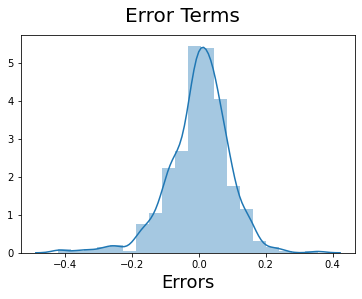

In [1169]:
# plot the histogram for the error terms
# 1st Assumption of residual error terms distribution

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

Applying the scaling on the test sets


In [1170]:

# 1. Create list of numeric variables that need to be scaled except binary and dummy variables

scale_list = ['temp', 'hum', 'windspeed', 'cnt']

# 3. Fit on data
# fit_transform() : it will do the fit() and transform() both on the dataset

df_test[scale_list] = scaler.transform(df_test[scale_list])

#### Dividing into X_test and y_test

In [1171]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1172]:
# Now let's use our model to make predictions.
X_train_new.columns
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_vif.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1173]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

## Model Evaluation

In [1174]:
# Evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8028405591555073

Text(0, 0.5, 'y_pred')

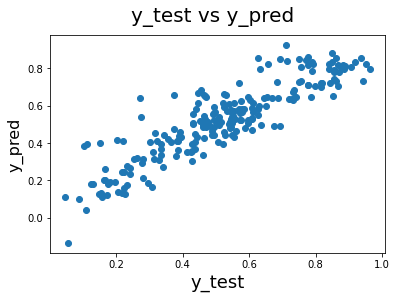

In [1175]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1176]:
# Evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8028405591555073

## Summary
- Model Selected : RFE Approach (15-Features)
- Stepwise manual feature elimination
- R-Squared : 0.834
- Adjusted R-Squared : 0.830
- R2_Score (y_test,y_test_pred): 0.8028

#### We can see that the equation of our best fitted line is:

cnt = 0.1958 + 0.2343*yr + 0.4799*temp + 0.1499*windspeed +  0.spring*Mon + 0.0613*summer + 0.0951*winter + 0.2865*Light Snow + 0.0803*Mist+Cloudy + 0.0462*Tue + 0.0853*Sept

Overall we have a decent model, but we also acknowledge that we could do better.

We have a couple of options:

Add new features back and perform more analysis 
Build a non-linear model